### Ch2 앙상블

#### 01 앙상블(ensemble)란 무엇일까?
    * 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법이다.
#### 02 랜덤 포레스트(RandomForest)는 무엇인가?
    * 원리
      01 트리를 많이 만든다.
      02 각각의 모델이 예측한다.
      03 예측한 값들의 평균값을 구한다. 이를 최종 예측값으로 이용
#### 03 실습

In [1]:
import seaborn as sns

In [2]:
tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


##### 데이터 셋 내용
    * total_bill : 총 지불 비용
    * tip : 팁
    * sex : 성별
    * smoker : 담배를 피는 안피는지
    * day : 이용한 요일
    * time : 점심인지 저녁인지
    * size : 식당 이용 인원

#### 04 머신러닝 과제

In [4]:
tips.shape

(244, 7)

    조건 1. 우리에게는 지금까지 이용한 고객의 180개의 데이터가 있다.
    조건 2. 이후에 몇명이 이용할지 모른다.
    조건 3. 우리는 몇명이 우리 식당에 방문할지 알아야 한다. 이 인원을 예측하는 머신러닝 시스템을 만들어, 이를 토대로 앞으로의 고객 서비스에 반영해보자.

주어진 데이터를 토대로 이용 고객을 예측해 보자.
우선 데이터 만들어보기

In [5]:
tips_have = tips.iloc[ 0:220, :]  # 현재 가진 고객 데이터
tips_new  = tips.iloc [220: , :]  # 미래의 고객 데이터 

tips_new.drop(["size"], axis=1, inplace=True)

tips_have.shape, tips_new.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((220, 7), (24, 6))

In [6]:
tips_have.columns, tips_new.columns

(Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object'),
 Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time'], dtype='object'))

#### 05 머신러닝 과제 수행

In [7]:
tips_have.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


    머신러닝은 숫자 데이터를 좋아하고 이해할 수 있다.
    그러면 total_bill, tip의 컬럼(변수)를 사용해서 size를 예측하는 것을 해보자.

In [8]:
sel = ['total_bill', 'tip']

#### 01 머신러닝에서 모델 만들고 예측해보기
    머신러닝은 다음과 같은 과정을 거친다.
    모델 만들고
    선택된 모델을 준비된 데이터(입력, 출력)로 학습을 시키고
    마지막으로 학습된 모델로 새로운 데이터를 예측을 수행한다.

##### 우리의 과제
    모델에 사용할 데이터를 준비한다.
     * 학습-입력(X_train), 학습-출력(y_train)
     * 예측에 사용할 새로운 데이터(X_test), y_test(는 예측되므로 없음)

In [9]:
# sel = ['total_bill', 'tip']

X = tips_have[sel]
y = tips_have['size']  # 우리가 예측할 컬럼(변수)

test_X = tips_new[sel]       # 예측할 친구는 다른 데이터 셋

##### 랜덤 포레스트 이용
     * 예측하려는 타깃(레이블)이 수치형일때는 RandomForestRegressor를 활용
     * 예측하려는 타깃(레이블)이 범주형일때는 RandomForestClassifier를 활용

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
model = RandomForestClassifier() # 모델 만들기
model.fit(X, y)     # 모델 훈련시키기  model.fit(입력, 출력)
pred = model.predict(test_X)    # 학습된 모델로 예측하기
pred

array([2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 5, 4, 4, 4, 4,
       2, 4])

#### 06 우리가 만든 모델이 좋은지 아닌지 어떻게 평가할 수 없을까?
    * 내가 만든 모델이 어느정도 좋은 성능을 가지는지 현재로서는 알기가 어렵다.
        * 해결 방안 1. tips_have에는 출력 size가 있다. tips_new는 없다. 그러면 우선 tips_have을 잘 데이터로 나누어 학습과 예측을 하여, 가진 답으로 맞추어보고 검증을 해보자.
    * train_test_split 함수를 이용하여 학습용, 테스트용으로 나눌 수 있다.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# random_state는 난수 발생기의 패턴을 고정시키기 위해 사용한다.
# 이를 통해 우리는 X(입력), y(출력)이 각각 학습용, 테스트용으로 나누어진다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### 07 다시 모델을 만들고, 이제는 평가가 가능하다. 살펴보자.

In [14]:
model = RandomForestClassifier() # 모델 만들기
model.fit(X_train, y_train)     # 모델 훈련시키기  model.fit(입력, 출력)
pred = model.predict(X_test)    # 학습된 모델로 예측하기
pred

array([2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 3, 2, 3, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 3, 2, 2, 2, 2, 2, 2])

##### 여기서 예측한 pred와 y_test는 비교하여 얼마나 정확하게 맞추었는지 확인할 수 있다.

In [15]:
pred == y_test  # 행별로 맞으면 True, 틀리면 False가 된다.

152    False
74      True
71     False
161     True
162     True
143    False
63     False
153    False
219    False
135     True
149     True
5      False
90      True
168     True
202     True
191     True
201     True
96     False
106     True
75      True
55     False
12      True
157     True
64     False
37     False
130     True
101     True
61      True
8       True
18     False
179    False
15     False
139     True
7      False
124     True
159    False
136     True
144    False
199     True
155    False
66      True
33     False
89      True
158     True
196     True
173     True
185    False
207     True
16      True
145     True
200    False
146    False
22      True
183    False
45      True
Name: size, dtype: bool

In [16]:
# 몇개 맞혔는가?
(pred == y_test).sum()

32

In [17]:
# 몇개 맞혔는가? 몇개중에 
(pred == y_test).sum() / len(pred)  * 100

58.18181818181818

정확도가 56.4%이다.

#### 08 다른 모델의 정확도는 어떨까? 확인해 보자.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [19]:
model = KNeighborsClassifier() # 모델 만들기
model.fit(X_train, y_train)     # 모델 훈련시키기  model.fit(입력, 출력)
pred = model.predict(X_test)    # 학습된 모델로 예측하기
pred

array([2, 2, 2, 2, 2, 4, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2,
       2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2])

In [21]:
# 정확도
(pred == y_test).sum() / len(pred)  * 100

52.72727272727272

In [22]:
model = DecisionTreeClassifier() # 모델 만들기
model.fit(X_train, y_train)     # 모델 훈련시키기  model.fit(입력, 출력)
pred = model.predict(X_test)    # 학습된 모델로 예측하기
pred

array([2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 3, 4, 2, 2, 2, 3, 3, 2, 2, 4, 3, 2, 2, 2,
       3, 2, 2, 4, 3, 2, 2, 4, 2, 2, 2])

In [23]:
import numpy as np

In [24]:
# 정확도
# (pred == y_test).sum() / len(pred)  * 100
np.mean(pred == y_test)

0.509090909090909

##### 결과 확인
    * 일반적인 모델 사용 결과 knn보다 의사결정트리가 좋고,
    * 의사결정트리보다 랜덤포레스트 모델이 좋다.
    * 랜덤포레스트는 많은 개수의 트리를 사용해서, 많은 트리를 사용하는 것이 좋은 것으로 보여진다.

In [25]:
import platform
import matplotlib
from matplotlib import font_manager, rc
import matplotlib

In [26]:
# 한글 및 마이너스 표시 설정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    matplotlib.rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

Unknown System


#### 01 앙상블을 활용한 유방암 유무 예측 모델 구축

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

    랜덤 포레스트는 **여러개의 모델 이용**이 가능하다.
         n_estimators 를 이용
    랜덤 포레스트는 각각의 **모델별 특징(변수) 선택을 제한**할 수 있다.

#### 실습 1-1
    * 데이터 셋 : 유방암 데이터 셋
    * 랜덤 포레스트 알고리즘을 이용하여 모델을 만들어보자.
    * (1) 모델의 학습용 세트 정확도, 테스트 세트 정확도를 확인해 보자.
        - 랜덤 포레스트 트리의 개수 = 5개, random_state=0, 최대 변수 선택 = 4

In [29]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=0f2b2ade3ec6771ce0576063780c4187bf3224e0123effeed25e19e504bd3cd1
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [30]:
# 01 데이터 셋 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
import mglearn
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

# 02 데이터 셋 나누기 및 학습
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                       stratify=cancer.target, random_state=42)

In [31]:
model = RandomForestClassifier(n_estimators=5, random_state=2)  # 5개의 트리 
model.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.958


##### 각각의 모델에 대한 정확도를 확인해 보자.
    * 모델의 model.estimators_로 각각의 모델에 접근이 가능하다.

In [32]:
model.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710)]

In [33]:
# 5개의 모델에 대한 정확도 평가
for one_model in model.estimators_:
    print("학습용 세트 정확도 : {:.3f}".format(one_model.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(one_model.score(X_test, y_test)))
    print()

학습용 세트 정확도 : 0.986
테스트 세트 정확도 : 0.937

학습용 세트 정확도 : 0.981
테스트 세트 정확도 : 0.944

학습용 세트 정확도 : 0.962
테스트 세트 정확도 : 0.937

학습용 세트 정확도 : 0.986
테스트 세트 정확도 : 0.944

학습용 세트 정확도 : 0.965
테스트 세트 정확도 : 0.909



##### 모델의 정보 확인

In [34]:
print(model.feature_importances_)  # 모델의 중요도
print(model.n_features_)           # 모델 사용 특징

[0.01573926 0.01565104 0.00203568 0.10677515 0.00583498 0.00250098
 0.00279083 0.1518233  0.00170642 0.         0.00408493 0.00285406
 0.00165178 0.00553254 0.         0.01549629 0.00621975 0.
 0.00340706 0.00362224 0.32952352 0.04192876 0.02694543 0.03620429
 0.02041974 0.00820242 0.01165303 0.15871316 0.01608264 0.00260073]
30


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
# model : 모델
# 데이터 셋
def plot_feature_important_common(model, dataset, col_names):
  imp = model.feature_importances_                   # feature의 중요도 
  n_features = dataset.shape[1]
  feature_names = col_names

  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
    
  plt.yticks(np.arange(n_features), feature_names)   # y축 값 지정

  plt.xlabel("feature importance")   
  plt.ylabel("feature")              
  plt.ylim(-1, n_features)

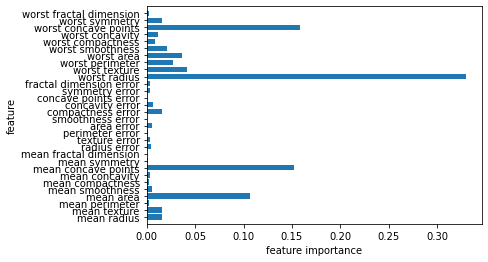

In [36]:
n_fea = cancer.data.shape[1]
plot_feature_important_common(model, cancer.data, cancer.feature_names)

##### 실습 1-2
     * tree의 수를 100개로 해 보고, 모델 만들고, 정보확인해보기

#### 02 모델 정보 시각화

    입력 : 100개 2열
    출력 : 100개 준비
이 데이터 셋을 기준으로 모델을 만든다.

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

# 100개 행, 2열
# make_moons() : 초승달 모양 클러스터 두 개의 형상의 데이터를 생성
# n_samples : 표본 데이터의 수, 기본 100개
# noise : 잡음의 크기. 0이면 정확한 반원을 이룬다. 
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
print(X.shape, y.shape)

print(X[0:5])
print(y[0:5])

(100, 2) (100,)
[[ 1.87756309  0.56839425]
 [ 0.36877983 -0.34894509]
 [ 0.96515318  0.10921819]
 [ 0.48599685  0.20291313]
 [ 1.72532644  0.53367598]]
[1 1 0 1 1]


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                    random_state=42)
m = RandomForestClassifier(n_estimators=5, random_state=2) # 5개의 트리
m.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

##### 코드 설명
    01 subplots로 2행 3열의 그래프를 기본 구조 지정
    02 [].set_title : 각 해당 위치의 제목을 지정
    03 tree을 보여주는 그래프를 그린다. 마지막은 random forest에 대한 그래프

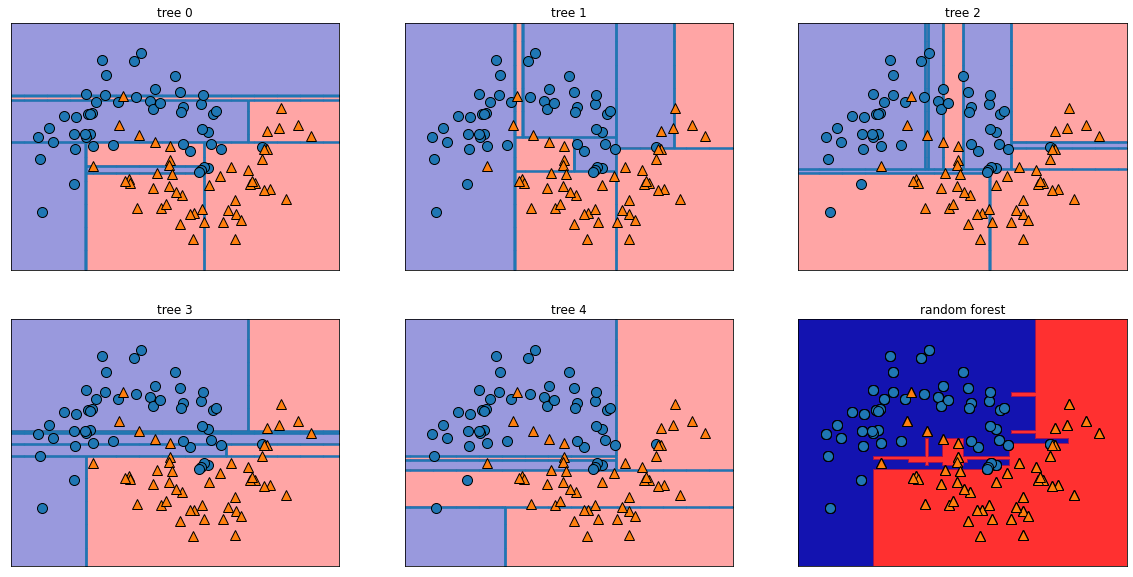

In [39]:
fig, axes = plt.subplots(2,3, figsize=(20,10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), m.estimators_)):
    ax.set_title("tree {}".format(i))  # 각 그래프 제목
    
    # 그래프 그리기 
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    mglearn.plots.plot_2d_separator(m, X, fill=True, ax=axes[-1,-1], alpha=.4)
    axes[-1, -1].set_title("random forest")
    
    mglearn.discrete_scatter(X[:, 0],X[:,1], y)

##### 추가 이해하기
    * ravel() 함수 이해하기
      ravel()함수를 이용하여 배열이 쫙 펴진다.

In [40]:
import numpy as np
array = np.arange(15).reshape(3, 5)
print("원래 배열 : \n", array)
print("\n ravel() 함수 이용 : ", array.ravel())

원래 배열 : 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

 ravel() 함수 이용 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


enumerate 이해

In [41]:
for i, name in enumerate(['body', 'foo', 'bar']):
    print(i, name)

0 body
1 foo
2 bar


zip이해

In [42]:
for i1, i2 in zip([11,12,13], [4,5,6]):
    print(i1, i2)

11 4
12 5
13 6


In [43]:
from IPython.display import display, Image

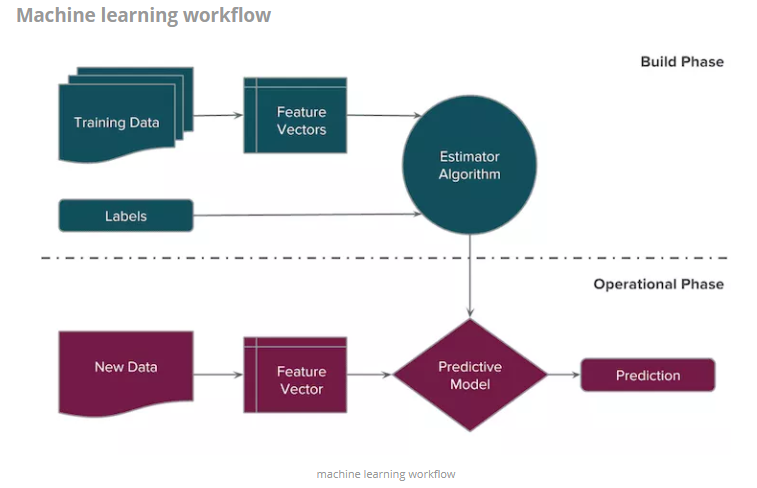

In [44]:
## 머신러닝 작업 flow
display(Image(filename='machineWorkflow01.png'))

#### 01 앙상블(Ensemble) 기법
##### 앙상블(ensemble)란?
    * 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법이다.
    * 대표적인 앙상블 기법인 랜덤 포레스트(random forest)와 그래디언트 부스팅(gradient boosting)결정 트리는 모델을 구성하는 기본 요소로 결정 트리를 사용한다.

##### 의사결정트리는 과적합되는 현상이 발생한다. 어떻게 해야 할까?
##### 가. 랜덤 포레스트(random forest)
        * 배경 : 의사 결정 트리는 학습용 데이터에 과대적합되는 경향이 있다.
        * 원리 : 조금씩 다른 여러 결정 트리의 묶음. 트리를 많이 만들고 각각의 모델에 대한 결과의 평균값을 구하면 일반화가 되어, 과대적합(Overfitting)을 줄일 수 있지 않을까?
        * 이렇게 하면 트리 모델의 예측 성능이 유지되면서 과대적합이 줄어든다는 것이 수학적으로 증명됨.

##### 　
#### 기본 아이디어
    (1) 만들어지는 각각의 트리는 타깃 예측을 잘해야 한다. 그리고 다른 트리와 구별되어야 한다.
    (2) 랜덤 포레스트는 각각의 트리 성격이 달라지도록 트리 생성 시에 데이터 샘플링의 무작위성을 주입한다.
    (3) 트리를 랜덤하게 만드는 방법은 2가지
        * 데이터 포인터를 무작위로 선택하는 방법
        * 분할 테스트(노드 데이터 조건) feature(특성)을 무작위로 선택 </pre>
##### 　
#### 나. 랜덤 포레스트 구축
    01 생성할 트리의 개수(n_estimators)를 선택한다.
    02 부트 스트랩 샘플(bootstrap sample)을 생성
       * n_samples개의 데이터 포인터 중에서 
       * 무작위로 데이터 n_samples 횟수만큼 반복 추출.(중복 추출 될 수 있음)
       * 중복 추출로 인해(대략 1/3정도) 누락될 수 있다. 또는 중복된 데이터가 있을 수 있다. 
    03 생성된 데이터 셋으로 결정 트리를 만든다.
       단, 여기서 특성(feature)는 무작위로 선택된 특성 중에서 최선의 테스트(조건)을 고른다. (max_features 매개변수로 몇 개의 feature를 고를지는 선택이 가능하다.)
              * max_feature 값을 크게 하면 랜덤 포레스트의 트리들은 매우 비슷해지고, 가장 두드러진 특성을 이용해 데이터에 잘 맞춰진다.
              * max_feature를 낮추면 랜덤 포레스트 트리들은 많이 달라지고 각 트리는 데이터에 맞추기 위해 깊이가 깊어진다.
    04 결과적으로 부트스트랩 샘플링은 랜덤 포레스트의 트리가 조금씩 다른 데이터셋을 이용해 만들어지도록 한다.
       각각의 트리는 전체 특성(feature)의 일부만을 사용한다. </pre>

#### 02 집값 데이터를 활용한 랜덤 포레스트 분석
##### 5개의 랜덤 포레스트 모델을 생성

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

컬럼명
* ID : 집을 구분하는 번호	
* date : 집을 구매한 날짜	
* price : 집의 가격(Target variable)	
* bedrooms : 침실의 수	
* bathrooms : 화장실의 수	
* sqft_living : 주거 공간의 평방 피트(면적)	
* sqft_lot : 부지의 평방 피트(면적)	
* floors : 집의 층 수	
* waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)	
* view : 집이 얼마나 좋아 보이는지의 정도	
* condition : 집의 전반적인 상태	
* grade	King County grading : 시스템 기준으로 매긴 집의 등급	
* sqft_above : 지하실을 제외한 평방 피트(면적)	
* sqft_basement : 지하실의 평방 피트(면적)	
* yr_built : 지어진 년도	
* yr_renovated : 집을 재건축한 년도	
* zipcode : 우편번호	
* lat : 위도	
* long : 경도	
* sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)	
* sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

### house 데이터셋 다운로드 안 됨.

### ch02 앙상블 기법- RandomForest(4)

#### 01. 랜덤포레스트 모델의 시각화를 해 보기

In [51]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

     |████████████████████████████████| 61 kB 111 kB/s 


##### 라이브러리 설치

In [55]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

In [56]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

##### 회귀 트리(Regression tree)
    데이터 셋 : boston data
    url : boston house-prices dataset (regression).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

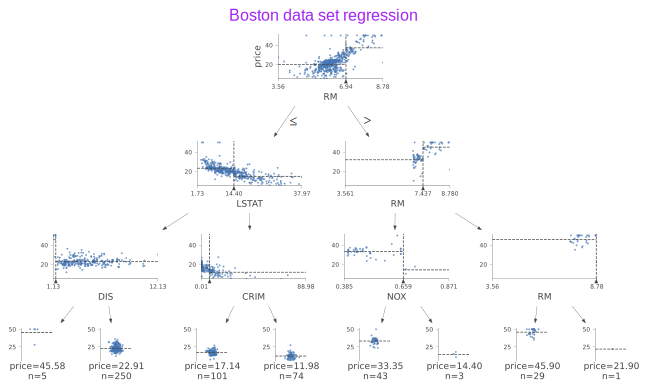

In [57]:
model = tree.DecisionTreeRegressor(max_depth=3)
boston = load_boston()

X_train = boston.data
y_train = boston.target
model.fit(X_train, y_train)

viz = dtreeviz(model,
               X_train,
               y_train,
               target_name='price',  # this name will be displayed at the leaf node
               feature_names=boston.feature_names,
               title="Boston data set regression",
               fontname="Arial",
               title_fontsize=16,
               colors = {"title":"purple"}
              )
viz

##### 이미지 스케일 조정

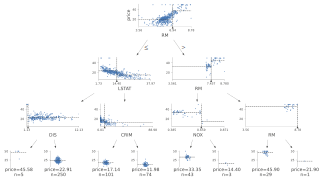

In [59]:
dtreeviz(model,
       X_train,
       y_train,
       target_name='price',  # this name will be displayed at the leaf node
       feature_names=boston.feature_names,
       scale=.5
      )

##### 분류 트리(Classification tree)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


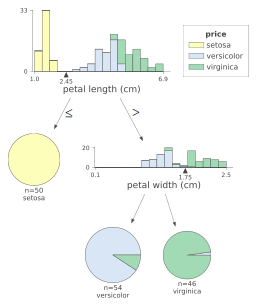

In [60]:
clas = tree.DecisionTreeClassifier(max_depth=2)  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='price',
               fontname="Arial",
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               histtype= 'barstacked')  # barstackes is default
viz

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


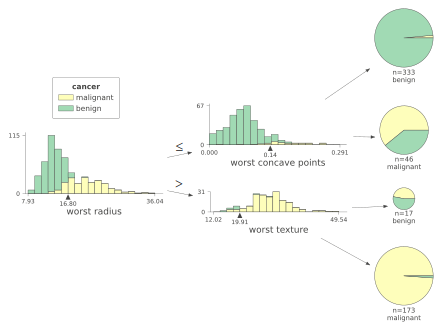

In [61]:
model = tree.DecisionTreeClassifier(max_depth=2)  
cancer = load_breast_cancer()

X_train = cancer.data
y_train = cancer.target
model.fit(X_train, y_train)

viz = dtreeviz(model, 
               X_train,
               y_train,
               target_name='cancer',
               feature_names=cancer.feature_names, 
               class_names=["malignant", "benign"],
               orientation='LR')
viz

In [62]:
regr = tree.DecisionTreeRegressor(max_depth=3)
diabetes = load_diabetes()

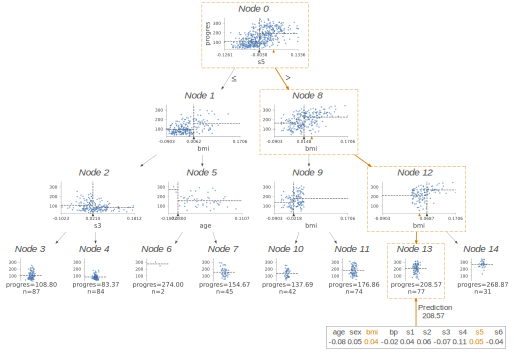

In [63]:
X_train = diabetes.data
y_train = diabetes.target
regr.fit(X_train, y_train)

X = diabetes.data[np.random.randint(0, len(diabetes.data)),:]

viz = dtreeviz(regr,
               X_train,
               y_train,
               target_name='progres',  # this name will be displayed at the leaf node
               feature_names=diabetes.feature_names,
               X=X, 
               show_node_labels = True,
               scale=.7
              )
viz

##### 캐글 코리아 2차 대회 데이터 셋 데이터
### 다운로드 불가 -> 건너뛰기

### ch02 gradient boosting 기법

In [64]:
from IPython.display import display, Image

In [65]:
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

In [66]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

Unknown System


##### 지난 시간 살펴보기
    (1) 지도학습에는 classificatoin(분류)와 Regression(회귀)로 나누어진다.
    (2) Classification은 이진분류(binary classification)과 다중 분류가 있다.
    (3) 모델을 만들때 과적합(Overfitting)을 피하고 일반화(generalization)이 되도록 해야 한다.

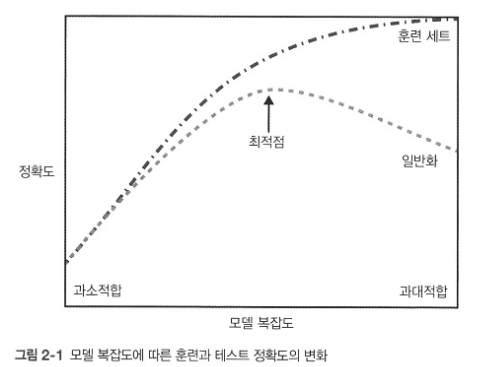

In [67]:
display(Image(filename='overfitting01.png'))

##### 선형모델(linear Regression)
    * 라쏘(Lasso Regression) - L1 규제(regularization)
      가중치를 w을 0으로 가깝게 제한하지만, 실제로 어떤 계수를 0으로 만든다.
    * 릿지(Ridge Regression) - L2 규제(regularization)
      가중치를 절대값을 가능한 한 작게 만든다.(w의 모든 원소가 0에 가깝게 되기를 원한다.)

##### 그래디언트 부스팅(Gradient Boosting)
    (가) 여러 개의 결정 트리를 묶어 강력한 모델을 만든다.
    (나) 분류(Classification)과 회귀(Regression)에 모두 사용 가능.
    (다) 랜덤포레스트(random forest)와 달리 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다.
         * 이전트리의 오차를 얼마나 강하게 보정할 것인가를 제어(learning_rate이다.)
    (라) 무작위성이 없으며, 대신 강력한 사전 가지치기(pruning)을 사용
    (마) 각각의 트리는 일부에 대해서만 예측을 잘 수행, 트리가 많을수록 성능이 좋아짐
    (바) 랜덤 포레스트보다 매개 변수 설정에 더 민감 잘 조정하면 더 높은 정확도를 얻을 수 있음.
    (사) 중요한 매개변수 중의 하나는 learning_rate이다. (학습률이 크면 보정을 강하게 한다.)
    (아) n_estimators 의 값은 앙상블에 더 많은 트리가 추가되어, 모델의 복잡도는 커지지만 훈련 세트에서의 실수를 보완된다.
    (자) 트리의 깊이가 5정도로서 깊지 않은 트리를 사용하여 메모리 사용이 적고 예측도 빠르다.

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [69]:
# n_features : 변수의 개수
# feature_names : 변수의 이름 
# model : 모델 
def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 

#### 01. GradientBoostig 알고리즘 실습
    depth는 3,
    트리 100개(n_estimators)
    학습률 : 0.1을 사용
    데이터 셋 : load_breast_cancer
                classification용 유방암 진단 자료

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

cancer = load_breast_cancer()

# 데이터 확인
print(cancer.keys())
print(cancer.target_names)      # 목적변수(종속변수)      
print(cancer.target) 
print(cancer.feature_names)
print(cancer.data.shape)        # 569행 , 30열
print(cancer.data)              # 설명변수(독립변수)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1

In [71]:
# 데이터 나누기 
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 모델 생성 및 학습
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [72]:
# 정확도 확인
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


* 훈련 세트의 정확도가 100%이므로 과대적합(Overfitting)

#### 02. 훈련세트에 대한 과적합을 줄이기
    max_depth 조절 : 트리의 깊이
    learning_rate 조절 : 학습 속도 조절
##### 모델의 depth의 조절
    훈련 세트의 정확도는 떨어지지만 테스트 세트의 정확도는 향상됨.

In [73]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


##### 트리의 학습률(learning_rate) 조절
    0.1 -> 0.01 로 조절

In [74]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


##### (실습 1) lr_rate를 아래와 같이 변경 후, 모델을 반복시켜 보자.
     [0.01, 0.05, 0.07, 0.09, 0.001, 0.005, 0.007]

##### 도전 실습
     어느경우에 테스트 세트 정확도는 가장 좋은 결과를 얻을까?

In [75]:
# model : 모델
# n_features : feature(변수의 개수)
# feature_names : 특성의 이름
def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 

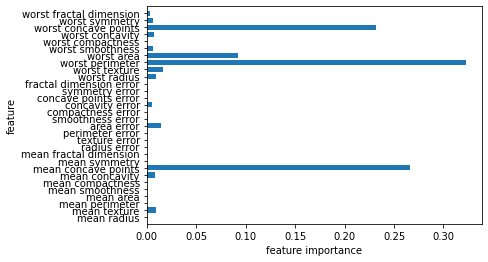

In [76]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1,learning_rate=0.1)
gbrt.fit(X_train, y_train)

feature_num = X_train.shape[1]
feature_names = cancer.feature_names

plot_feature_important_up(gbrt, feature_num, feature_names)

In [77]:
import pandas as pd
import seaborn as sns

In [78]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

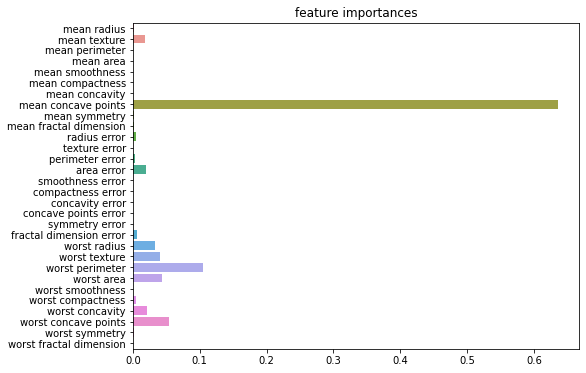

In [79]:
fea_imp_values = gbrt.feature_importances_
importances = pd.Series(fea_imp_values, index=feature_names)

plt.figure(figsize=(8,6))
plt.title('feature importances')
sns.barplot(x=importances, y=importances.index)

    그래디언트 부스팅은 일부 특성을 완전히 무시
    비슷한 종류의 데이터에서 보통 더 안정적인 랜덤 포레스트를 먼저 적용해본다.

##### 모델의 장단점
    단점 :
          매개변수를 잘 조정해야 하며, 훈련 시간이 길다.
    장점 :
          feature의 scale(범위, 값)을 조정하지 않아도 이진특성이 연속적인 특성에서 잘 동작
          feature 의 스케일을 조정하지 않아도 된다.

##### 매개변수
    이전트리의 오차를 보정하는 정도 조절 : learning_rate
         * learning_rate를 낮추면 =>> 비슷한 복잡도의 모델을 만들기 위해 더 많은 트리를 추가해야 한다.
    n_estimator가 클수록 좋다.
    n_estimator가 크면 그래디언트 부스팅은 과적합의 가능성이 있음.
    트리의 복잡도를 낮추는 max_depth (또는 max_leaf_nodes)
    보통 부스팅 모델에서 max_depth를 매우작게 설정하며 트리의 깊이가 5보다 깊어지지 않도록 한다.
    n_estimators를 맞춘 이후에 learning_rate를 찾는다.

##### 과제 1 - A
    (1) 타이타닉 데이터를 이용하여 모델을 만들어보자.
    (2) 제출해 보고 등수 확인해 보기

##### REF
    The Elements of Statistical Learning : http://statweb.stanford.edu/~tibs/ElemStatLearn